In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
#read the file
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [83]:
#drop the rows with missing values
df.dropna(inplace=True)

In [84]:
#list the columns
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [85]:
# Count of each value of y
vc=df['Diabetes_012'].value_counts()
total=vc[0]+vc[1]+vc[2]
diab_0=vc[0]/total
diab_1=vc[1]/total
diab_2=vc[2]/total

print(vc)
print(diab_0*100,diab_1*100,diab_2*100)

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64
84.24116997792494 1.8255282245348472 13.933301797540206


##### We observe a high class imbalance in the dataset with 84% patients with no diabetes, 14% with diabetes and around 1.8% being pre diabetic

# Exploratory Data Analysis

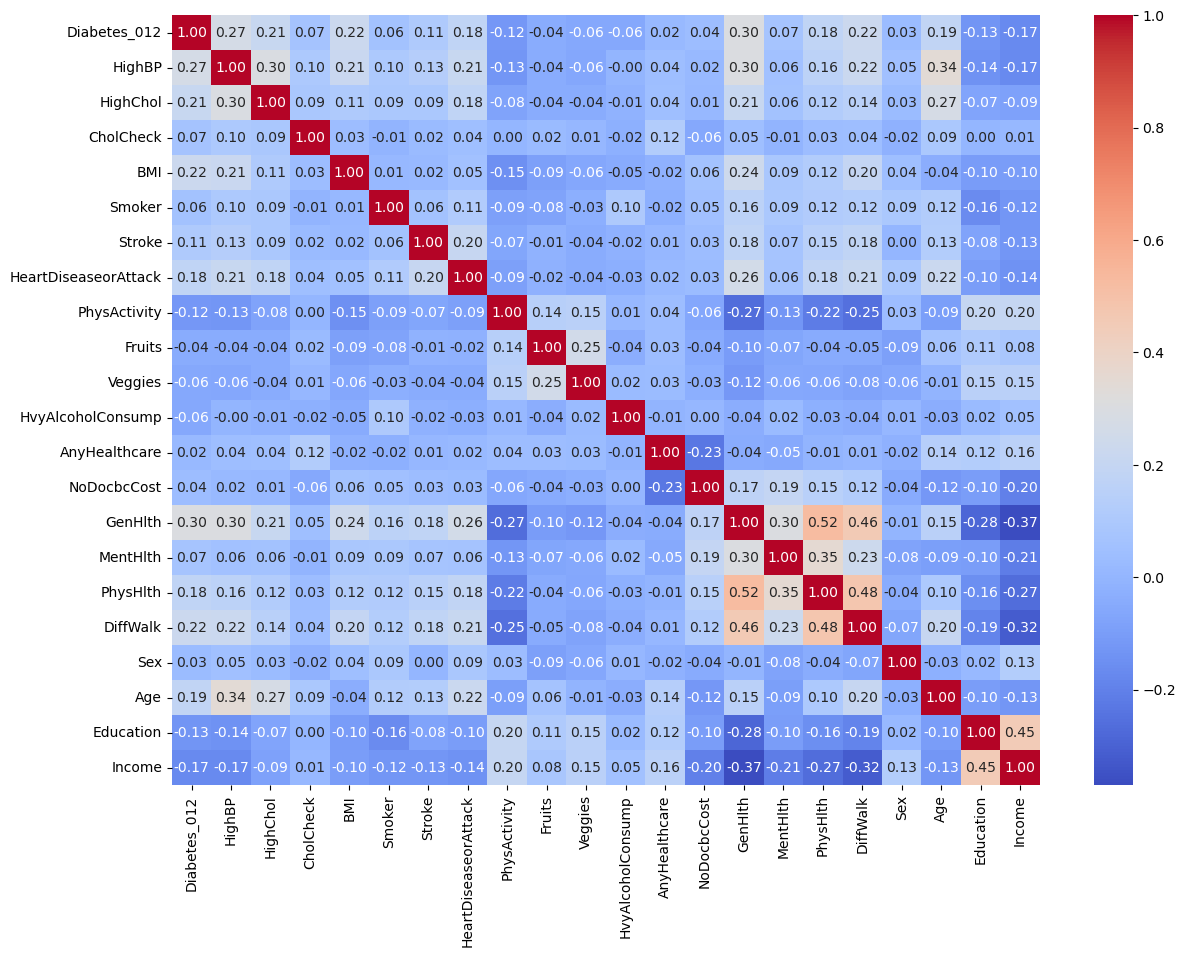

In [145]:
# Compute the correlation matrix
corr=df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

#### Insights:
1. There is a strong positive correlation between GenHlth (General Health) and DiffWalk (Difficulty Walking), which suggests that poorer general health is associated with increased difficulty in walking.

2. The same can be seen between GenHlth and PhystHlth (Physical Health), indicating that poorer general health is associated with poorer Physical health. Similar thing can be observed with mental health as well.
    
3. The variable Income seems to have a moderately negative correlation with GenHlth, which could indicate that higher income levels might be associated with better general health (since a lower score in GenHlth indicates better health).

4. BMI is likely to correlate positively with Diabetes, as a higher BMI can be a risk factor for diabetes.

5. Similarly, HighChol and HighBP might also have a positive correlation with Diabetes.

## Effect of Lifestyle on Diabetes

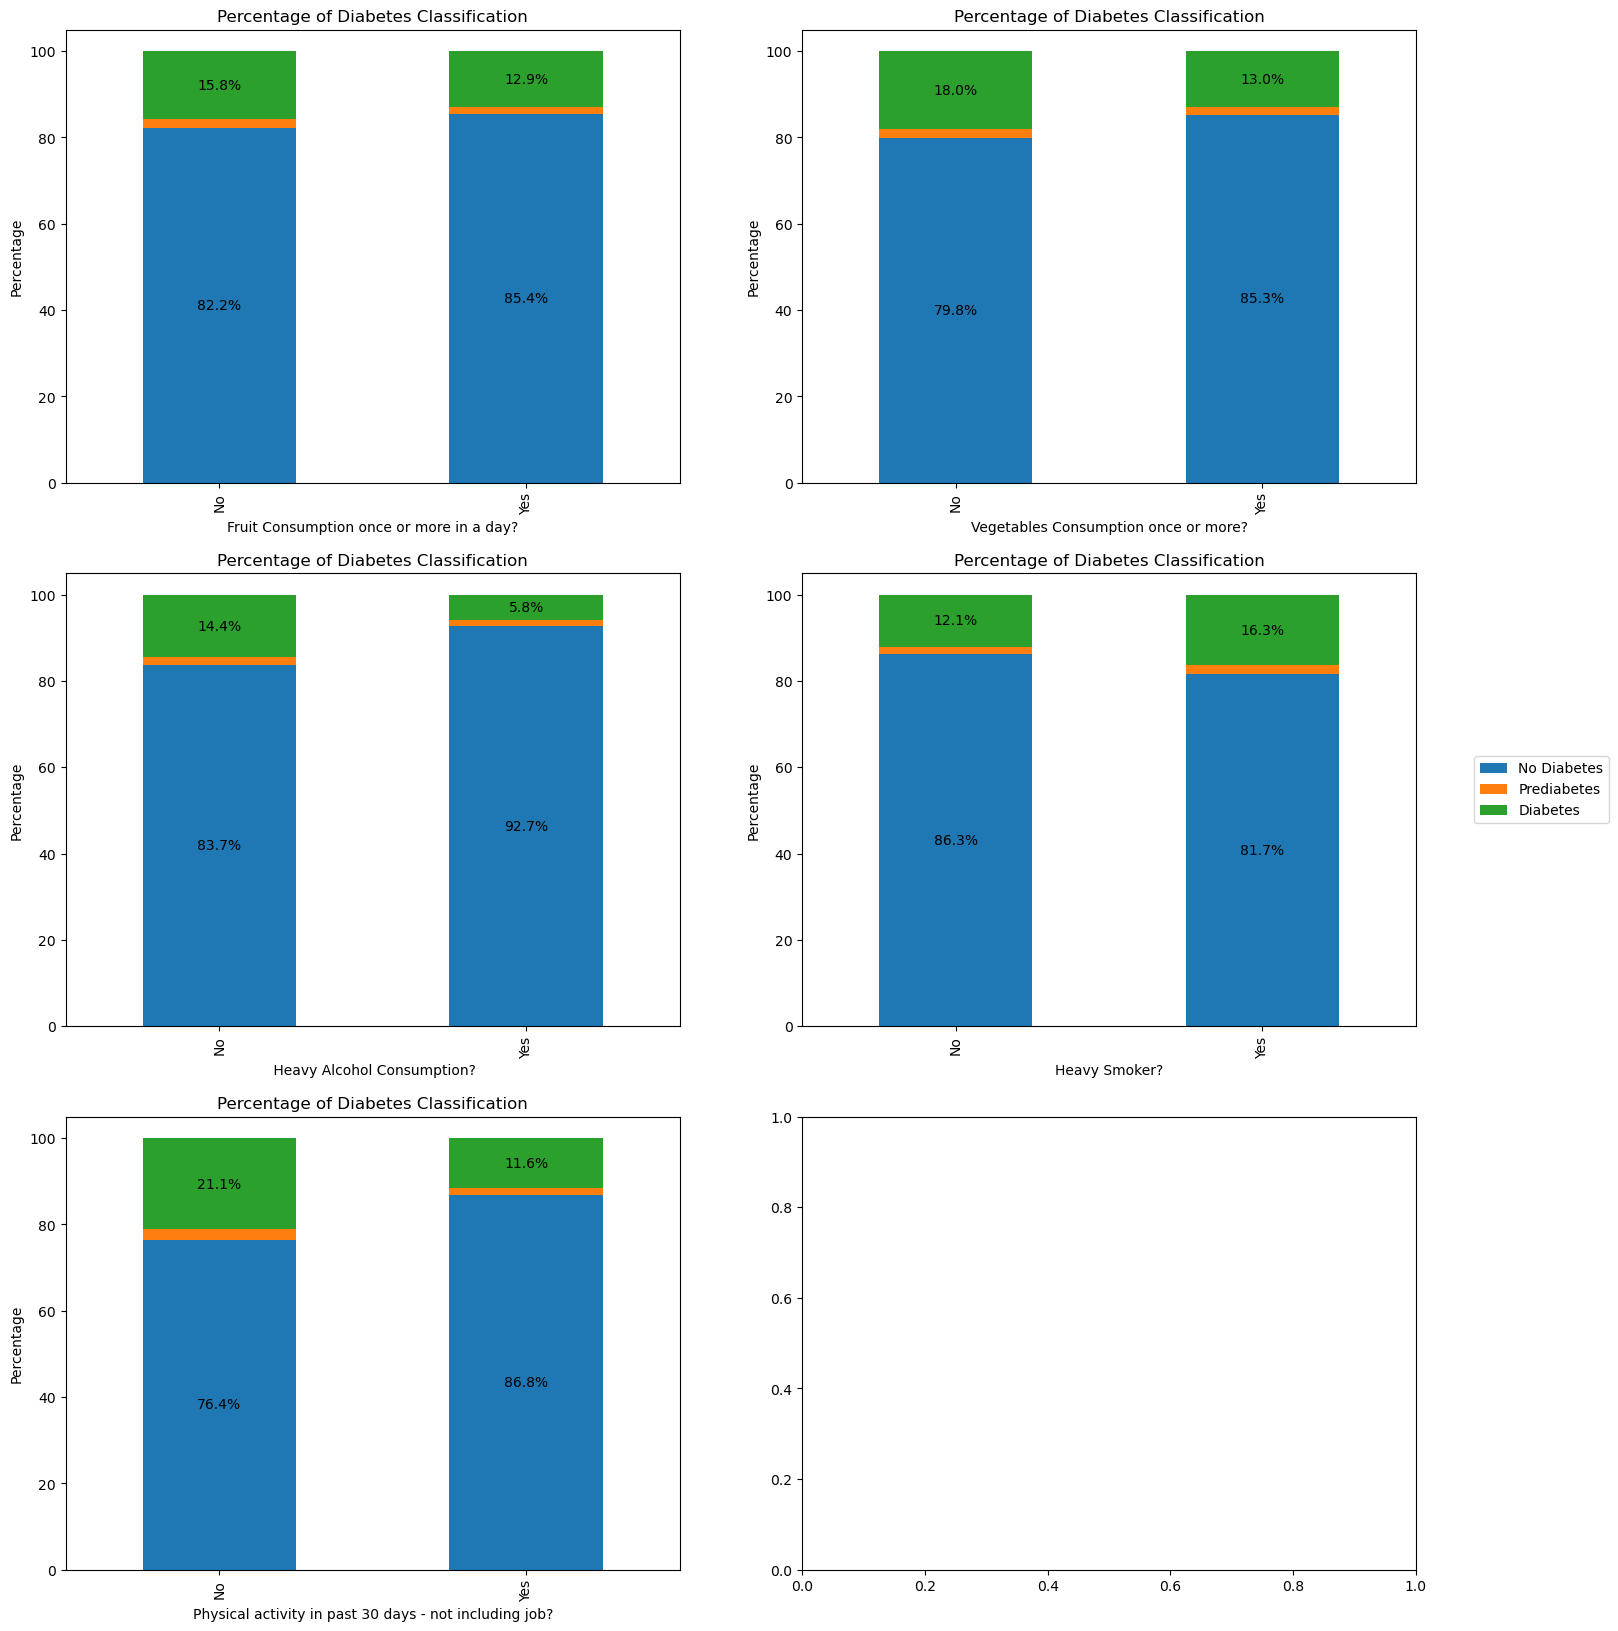

In [147]:
# Adjusting the figure to ensure there is no overlap between the graphs and the common legend

# Create a 2x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(20, 20), constrained_layout=False)

# Function to add percentage labels
def add_percentage_labels(ax, df):
    for c in ax.containers:
        labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

# Plot configurations are the same, but we leave out the legend in individual plots
for (i, (column, title)) in enumerate(zip(['Fruits', 'Veggies', 'HvyAlcoholConsump', 'Smoker','PhysActivity'],
                                          ['Fruit Consumption once or more in a day?', 'Vegetables Consumption once or more?', 
                                           ' Heavy Alcohol Consumption?', 'Heavy Smoker?','Physical activity in past 30 days - not including job?'])):
    ax = axs[i//2, i%2]
    diabetes_percentages = df.groupby([column, 'Diabetes_012']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack()
    diabetes_percentages.plot(kind='bar', stacked=True, ax=ax, legend=False)
    add_percentage_labels(ax, diabetes_percentages)
    ax.set_title(f'Percentage of Diabetes Classification')
    ax.set_xlabel(title)
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['No', 'Yes'] * (len(ax.get_xticklabels()) // 2))

# Adjust layout to prevent overlap
plt.subplots_adjust(right=0.8)

# Add a common legend outside of the top right corner of the grid
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, ['No Diabetes', 'Prediabetes', 'Diabetes'], loc='center right', bbox_to_anchor=(0.9, 0.5))

plt.show()


##### Observations
1. The graph indicates that among individuals who consume fruit one or more times a day, the percentage of those with diabetes (the green segment) is lower (12.9%) compared to those who do not consume fruit (15.8%). This suggests a potential association between higher fruit consumption and a lower rate of diabetes.

2. The rates of prediabetes (the orange segment) appear to be very similar regardless of fruit consumption, indicating that fruit consumption might not have as strong an association with prediabetes status as with diabetes status.

3. Similar to the previous observation with fruit consumption, individuals who consume vegetables one or more times a day have a lower percentage of diabetes (13.0%) compared to those who do not consume vegetables (18.0%). This suggests a potential association between regular vegetable consumption and a lower incidence of diabetes.

4. Interestingly, we find that individuals who are heavy consumers of alcohol have a lower percentage of diabetes than the ones who do not consume alcohol.

## Effect of Health Related Issues on Diabetes

###### Effect of BMI

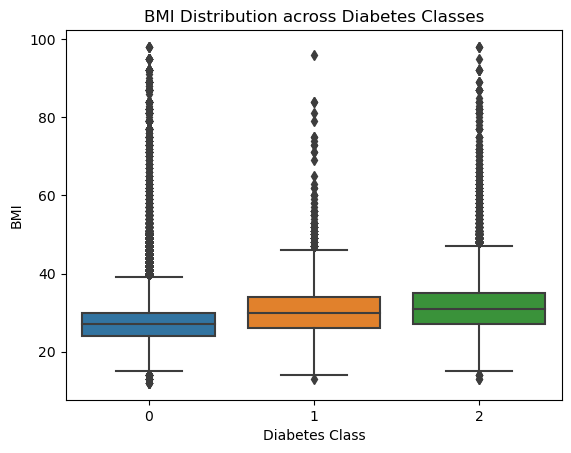

In [132]:
#Effect of BMI
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('BMI Distribution across Diabetes Classes')
plt.xlabel('Diabetes Class')
plt.ylabel('BMI')
plt.show()

##### Observation
1. People who are diabetic or pre-diabetic have higher BMI then peoplw who do not.

##### Effect of Cholestrol Levels

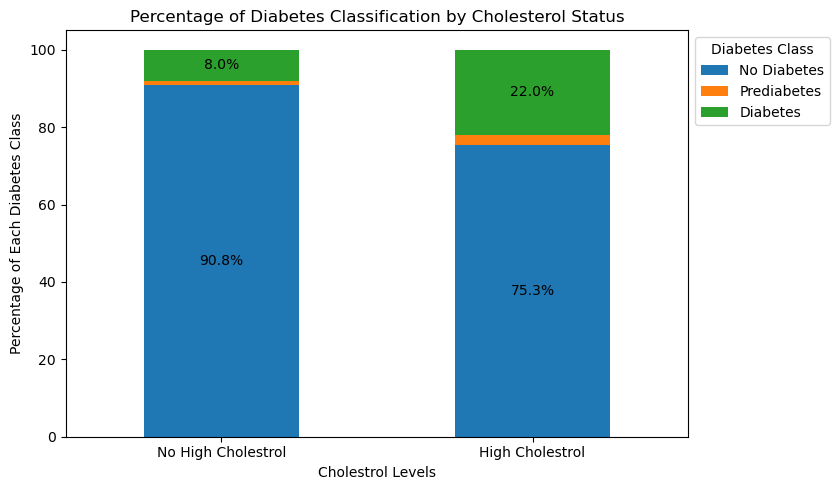

In [134]:
# We will re-plot the graph with the legend moved to the right top and ensure there is no overlap.
diabetes_percentages = df.groupby(['HighChol', 'Diabetes_012']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
# Create a bar plot
ax = diabetes_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the percentage text on the bars
for c in ax.containers:
    # Optional: if the segment is too small, don't place a label
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Adding titles and labels
plt.title('Percentage of Diabetes Classification by Cholesterol Status')
plt.xlabel('Cholestrol Levels')
plt.ylabel('Percentage of Each Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['No High Cholestrol', 'High Cholestrol'], rotation=0)

# Move the legend to the right top and outside of the plot area
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], loc='upper left', bbox_to_anchor=(1,1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

# Show plot with the adjusted legend
plt.show()


##### Effect of High Blood Pressure

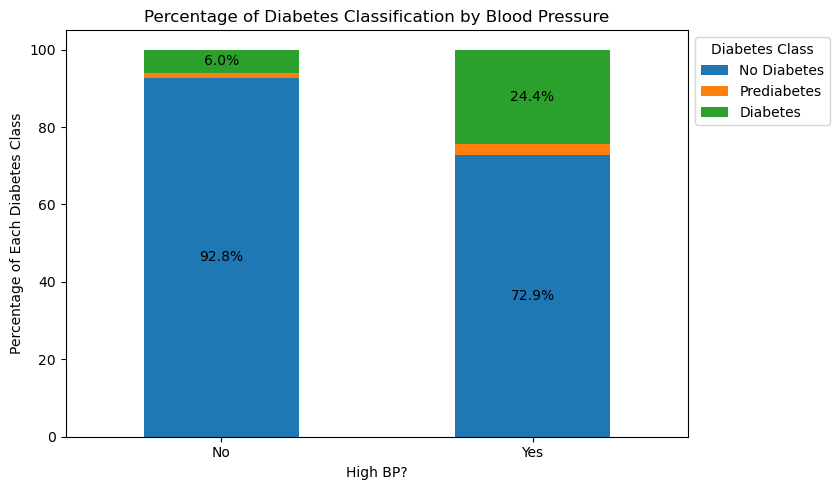

In [136]:
# We will re-plot the graph with the legend moved to the right top and ensure there is no overlap.
diabetes_percentages = df.groupby(['HighBP', 'Diabetes_012']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
# Create a bar plot
ax = diabetes_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the percentage text on the bars
for c in ax.containers:
    # Optional: if the segment is too small, don't place a label
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Adding titles and labels
plt.title('Percentage of Diabetes Classification by Blood Pressure')
plt.xlabel('High BP?')
plt.ylabel('Percentage of Each Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Move the legend to the right top and outside of the plot area
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], loc='upper left', bbox_to_anchor=(1,1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

# Show plot with the adjusted legend
plt.show()


##### Effect of Stroke

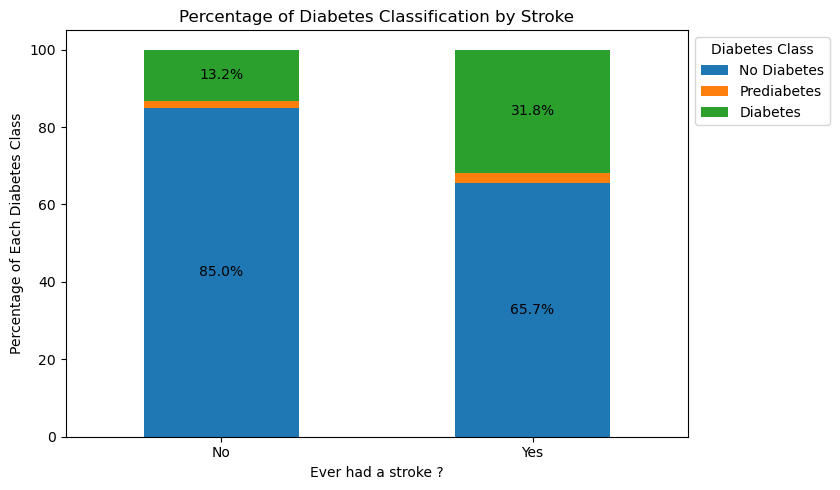

In [140]:
# We will re-plot the graph with the legend moved to the right top and ensure there is no overlap.
diabetes_percentages = df.groupby(['Stroke', 'Diabetes_012']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
# Create a bar plot
ax = diabetes_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the percentage text on the bars
for c in ax.containers:
    # Optional: if the segment is too small, don't place a label
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Adding titles and labels
plt.title('Percentage of Diabetes Classification by Stroke')
plt.xlabel('Ever had a stroke ?')
plt.ylabel('Percentage of Each Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Move the legend to the right top and outside of the plot area
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], loc='upper left', bbox_to_anchor=(1,1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

# Show plot with the adjusted legend
plt.show()


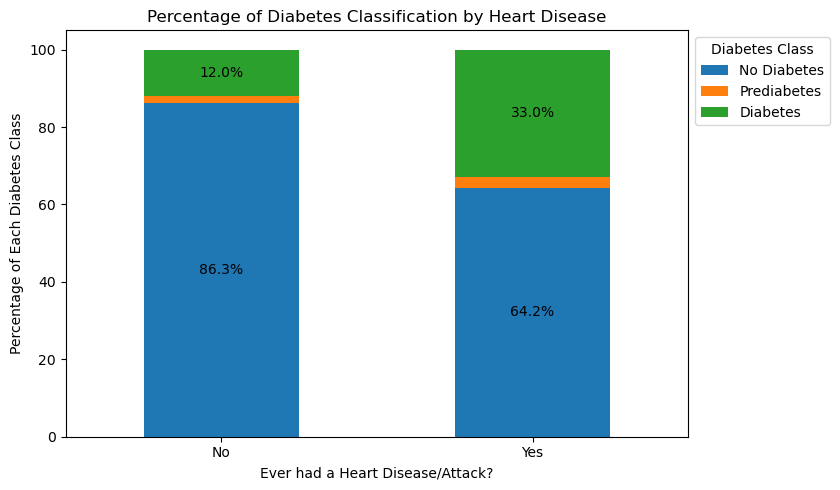

In [142]:
# We will re-plot the graph with the legend moved to the right top and ensure there is no overlap.
diabetes_percentages = df.groupby(['HeartDiseaseorAttack', 'Diabetes_012']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
# Create a bar plot
ax = diabetes_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the percentage text on the bars
for c in ax.containers:
    # Optional: if the segment is too small, don't place a label
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Adding titles and labels
plt.title('Percentage of Diabetes Classification by Heart Disease')
plt.xlabel('Ever had a Heart Disease/Attack?')
plt.ylabel('Percentage of Each Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Move the legend to the right top and outside of the plot area
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], loc='upper left', bbox_to_anchor=(1,1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

# Show plot with the adjusted legend
plt.show()


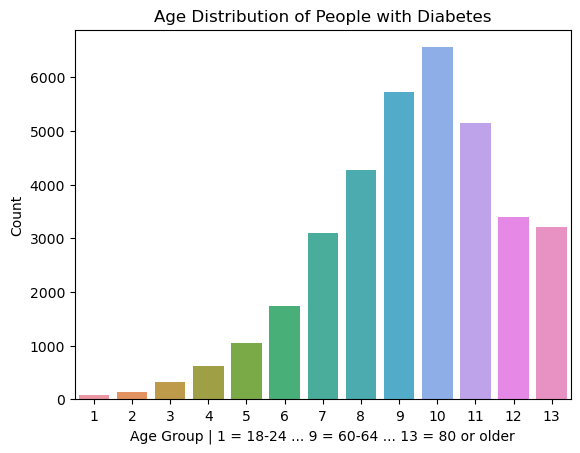

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to include only the people with diabetes
df_diabetes_only = df[df['Diabetes_012'] == 2]

# Now create a count plot for only the people with diabetes
sns.countplot(x='Age', data=df_diabetes_only)
plt.title('Age Distribution of People with Diabetes')
plt.xlabel('Age Group | 1 = 18-24 ... 9 = 60-64 ... 13 = 80 or older')
plt.ylabel('Count')
plt.show()

##### Observation
1. The number of people with Diabetes increases as the age increases till around 70 years of age.

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and it's already preprocessed
# Let's say 'target' is your target variable
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train logistic regression model
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

recall = recall_score(y_test, predictions, average='macro')  # Use 'macro' for multiclass classification
print(f'Recall: {recall}')

coefficients = model.coef_[0] 

# Map coefficients to feature names
feature_importance = pd.Series(coefficients, index=X.columns)

# Display feature importance
print(feature_importance.sort_values(ascending=False))

cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#Recall- Of all the actual true cases, how many true cases are getting predicted